# Решающие деревья и случайные леса

Импортируем данные: датасет [Wine Quality]().   
Будем предсказывать качество белого вина по его химическим характеристикам, будем считать это задачей классификации. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', delimiter=';')

In [3]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


Посмотрим на распределение классов. 

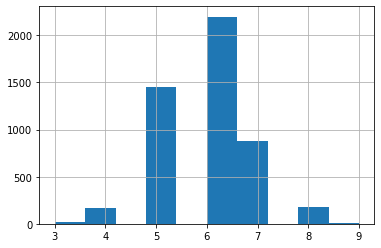

In [4]:
wine.quality.hist()

Видим дисбаланс классов.

## Делим на обучающую и тестовую выборку

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
RANDOM_SEED = 0

In [7]:
target = wine.quality
data = wine.drop(columns=['quality'])

Обращаем внимание на параметр **stratify**, он нужен при работе с несбаласнсированными классами. Позволят сделать так, чтобы в обучающей и тестовой выборке соотношение количества объектов разных классов было примерно одинаковым. 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=RANDOM_SEED, stratify=target)

## Решающее дерево

Обучим решающее дерево без ограничений по глубине и количеству объектов в листе и оценим качество.

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [10]:
tree_clf = DecisionTreeClassifier()

In [11]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [12]:
y_pred = tree_clf.predict(X_test)

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.33      0.32      0.32        41
           5       0.60      0.62      0.61       364
           6       0.66      0.62      0.64       550
           7       0.51      0.54      0.53       220
           8       0.44      0.52      0.48        44
           9       0.00      0.00      0.00         1

    accuracy                           0.59      1225
   macro avg       0.36      0.37      0.37      1225
weighted avg       0.59      0.59      0.59      1225



## Решающий лес

Обучим решающий лес состоящий из 100 деревьев. 

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rf_clf = RandomForestClassifier(n_estimators=100)

In [16]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
y_pred = rf_clf.predict(X_test)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       1.00      0.24      0.39        41
           5       0.69      0.69      0.69       364
           6       0.65      0.79      0.71       550
           7       0.70      0.51      0.59       220
           8       0.87      0.45      0.60        44
           9       0.00      0.00      0.00         1

    accuracy                           0.68      1225
   macro avg       0.56      0.38      0.43      1225
weighted avg       0.69      0.68      0.67      1225



/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Зависимотсть качества предсказаний от количества деревьев.

Будем смотреть на взвешенное среднее f1-меры по всем классам на обучающей и тестовой выборке, а также на время обучения 

In [19]:
from sklearn.metrics import f1_score
import time

num_trees = [1]
num_trees.extend(range(10, 100, 10))
num_trees.extend(range(100, 1100, 100))

quality_train = []
quality_test = []
training_time = []


for num in num_trees:
    model = RandomForestClassifier(n_estimators=num)

    start = time.time()
    model.fit(X_train, y_train)
    training_time.append(time.time() - start)

    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    quality_train.append(f1_score(y_train, y_pred_train, average='weighted'))
    quality_test.append(f1_score(y_test, y_pred, average='weighted'))



/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lena/anaconda3/lib/python3.7/s

Строим график зависимости качества от количества деревьев

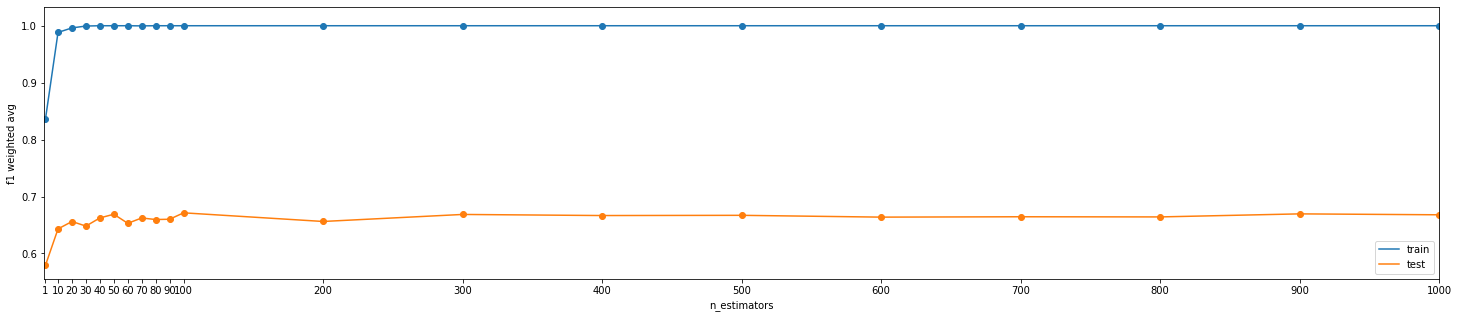

In [20]:
plt.figure(figsize=(25, 5)) # задаем размер графика

plt.scatter(num_trees, quality_train) # рисуем точки
plt.plot(num_trees, quality_train, label='train') # соединяем точки линией
plt.scatter(num_trees, quality_test)
plt.plot(num_trees, quality_test, label='test')

plt.xlim(0, num_trees[-1])
plt.xticks(num_trees)
plt.xlabel("n_estimators")
plt.ylabel("f1 weighted avg")
plt.legend(loc="lower right")
plt.show()

Строим график зависимости времени обучения от количества деревьев

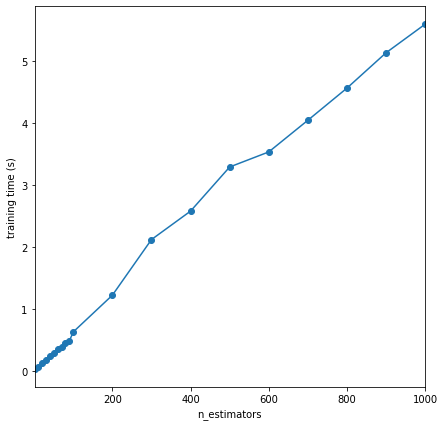

In [21]:
plt.figure(figsize=(7, 7))

plt.scatter(num_trees, training_time)
plt.plot(num_trees, training_time)

plt.xlim(num_trees[0], num_trees[-1])
plt.xlabel("n_estimators")
plt.ylabel("training time (s)")
plt.show()

## Важность признаков

In [22]:
feature_importances = rf_clf.feature_importances_

In [23]:
# веса признаков, чем больше вес, тем важнее признак, в сумме дают 1
feature_importances

array([0.07364609, 0.0990814 , 0.08148242, 0.08838969, 0.08657384,
       0.09800055, 0.09003763, 0.10083921, 0.08713678, 0.07969135,
       0.11512103])

In [24]:
# соотнести массив весов с названиями признаков и отсортировать по убыванию
for ind in np.argsort(-feature_importances):
    print(data.columns[ind], '-', feature_importances[ind])

alcohol - 0.11512103306254805
density - 0.10083921303286891
volatile acidity - 0.09908140466414357
free sulfur dioxide - 0.09800055176222884
total sulfur dioxide - 0.09003763111166972
residual sugar - 0.0883896906862318
pH - 0.08713677536274114
chlorides - 0.08657384298241817
citric acid - 0.08148241930641087
sulphates - 0.07969135185386238
fixed acidity - 0.07364608617487663


Посмотрим на корреляцию между крепостью вина и его оценкой. 

In [25]:
wine.corr().quality.alcohol

0.4355747154613688

Чем крепче, тем лучше!